### Data Preparation


In [3]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!cp -r /content/drive/MyDrive/deepfake-detection /content/deepfake-detection

^C


In [ ]:
os.chdir('./dfdc')

In [ ]:
!zip -r myfiles.zip ./faces

 (stored 0%)
  adding: faces/jzoyzlgwlc/65.png (deflated 0%)
  adding: faces/jzoyzlgwlc/66.png (deflated 0%)
  adding: faces/jzoyzlgwlc/67.png (deflated 0%)
  adding: faces/jzoyzlgwlc/68.png (deflated 0%)
  adding: faces/jzoyzlgwlc/69.png (stored 0%)
  adding: faces/jzoyzlgwlc/70.png (deflated 0%)
  adding: faces/jzoyzlgwlc/71.png (deflated 0%)
  adding: faces/jzoyzlgwlc/72.png (deflated 0%)
  adding: faces/jzoyzlgwlc/73.png (deflated 0%)
  adding: faces/jzoyzlgwlc/74.png (deflated 0%)
  adding: faces/jzoyzlgwlc/75.png (deflated 0%)
  adding: faces/jzoyzlgwlc/76.png (deflated 0%)
  adding: faces/jzoyzlgwlc/77.png (deflated 0%)
  adding: faces/jzoyzlgwlc/78.png (deflated 0%)
  adding: faces/jzoyzlgwlc/79.png (deflated 0%)
  adding: faces/jzoyzlgwlc/80.png (deflated 0%)
  adding: faces/jzoyzlgwlc/81.png (stored 0%)
  adding: faces/jzoyzlgwlc/82.png (stored 0%)
  adding: faces/jzoyzlgwlc/83.png (deflated 0%)
  adding: faces/jzoyzlgwlc/84.png (deflated 0%)
  adding: faces/jzoyzlgwlc/85.png

In [ ]:
os.chdir('../CelebDF-v2')

In [ ]:
!zip -r -q celebfaces.zip ./faces 

### DFDC EDA

In [ ]:
os.chdir('/content/drive/MyDrive/deepfake-detection')

In [ ]:
BASE_DIR ='/content/drive/MyDrive/deepfake-detection/dfdc'
folds = ['dfdc_train_part_0/', 'dfdc_train_part_1/', 'dfdc_train_part_2/']

df_list = []

for f in folds: 
  path = os.path.join(BASE_DIR, f)
  df_list.append(pd.read_json(path + 'metadata.json').transpose())
  df_list[-1]['fullpath'] = path + df_list[-1].index

df = pd.concat(df_list)


In [ ]:
df.head()

label  split        original  \
owxbbpjpch.mp4  FAKE  train  wynotylpnm.mp4   
vpmyeepbep.mp4  REAL  train             NaN   
fzvpbrzssi.mp4  REAL  train             NaN   
htorvhbcae.mp4  FAKE  train  wclvkepakb.mp4   
fckxaqjbxk.mp4  FAKE  train  vpmyeepbep.mp4   

                                                         fullpath  
owxbbpjpch.mp4  /content/drive/MyDrive/deepfake-detection/dfdc...  
vpmyeepbep.mp4  /content/drive/MyDrive/deepfake-detection/dfdc...  
fzvpbrzssi.mp4  /content/drive/MyDrive/deepfake-detection/dfdc...  
htorvhbcae.mp4  /content/drive/MyDrive/deepfake-detection/dfdc...  
fckxaqjbxk.mp4  /content/drive/MyDrive/deepfake-detection/dfdc...

In [ ]:
df.describe()

label  split        original  \
count   4781   4781            4357   
unique     2      1             424   
top     FAKE  train  ypgayhhaxx.mp4   
freq    4357   4781              39   

                                                 fullpath  
count                                                4781  
unique                                               4781  
top     /content/drive/MyDrive/deepfake-detection/dfdc...  
freq                                                    1

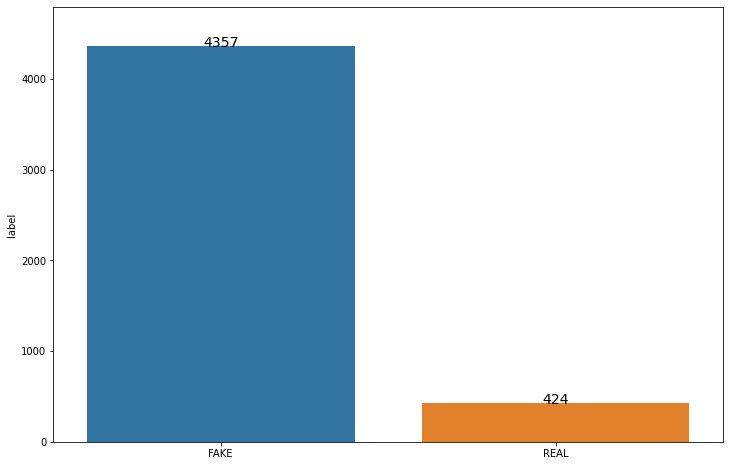

In [ ]:
import seaborn as sns
#plot and annotate data
frequencies= df.label.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df.label.unique(), y=frequencies, ax=ax)

for i in range(len(frequencies)):
        plt.text(i, frequencies[i], frequencies[i], ha = 'center', fontsize=14)

ax.margins(y=0.1)

In [ ]:
df['original'].value_counts()[:20]

ypgayhhaxx.mp4    39
fdpisghkmd.mp4    36
fneqiqpqvs.mp4    35
fnslimfagb.mp4    35
wynotylpnm.mp4    34
ywauoonmlr.mp4    34
fhjhvdgmcq.mp4    34
objgwnmscm.mp4    34
fsaronfupy.mp4    33
ajiyrjfyzp.mp4    33
pdufsewrec.mp4    32
eynxajczkd.mp4    32
qarqtkvgby.mp4    32
nbdixxfjph.mp4    32
wfihvsniyz.mp4    32
uonwfowmfa.mp4    32
uprwuohbwx.mp4    32
cnpanmywno.mp4    31
fopjiyxiqd.mp4    31
kiyvsruaai.mp4    31
Name: original, dtype: int64

In [ ]:
import cv2 

def extract_frame(video):
    video_cap = cv2.VideoCapture(video) 

    while (video_cap.isOpened()):
      ret, frame = video_cap.read()
      if ret == False:
        break
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      video_cap.release()
      return frame

def display_frames_from_list(video_list):

    frames = []

    for video in video_list: 
        frame = extract_frame(video)
        frames.append(frame)


    fig, axs = plt.subplots(1, 3, squeeze=False, figsize=(20,20))
    for i in range(0, len(frames)):
      frame = frames[i]

      r = i // 3 
      c = i % 3

      axs[r,c].imshow(frame)
      axs[r,c].axis('off')
      axs[r,c].set_title(str(i))



Display some images sample of fake videos 


In [ ]:
fake_sample = df[df.label == 'FAKE'].sample(3).fullpath.to_list()
fake_sample

['./dfdc/dfdc_train_part_2/pfopkowwfo.mp4',
 './dfdc/dfdc_train_part_1/zrrncwxmdc.mp4',
 './dfdc/dfdc_train_part_2/otilzpjrfc.mp4']

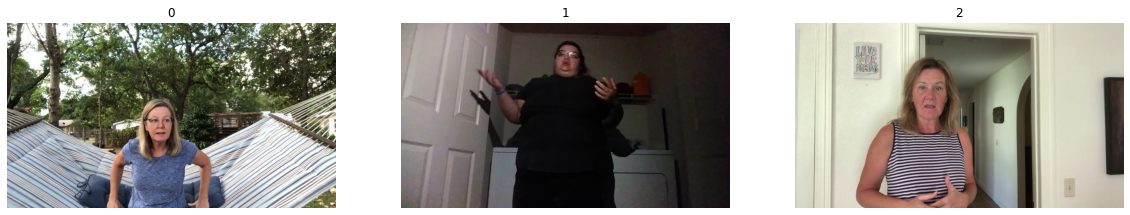

In [ ]:
display_frames_from_list(fake_sample)

In [ ]:
real_sample = df[df.label == 'REAL'].sample(3).fullpath.to_list()
real_sample

['./dfdc/dfdc_train_part_2/uuqrzdhjuh.mp4',
 './dfdc/dfdc_train_part_2/oojxonbgow.mp4',
 './dfdc/dfdc_train_part_2/jjycletzyl.mp4']

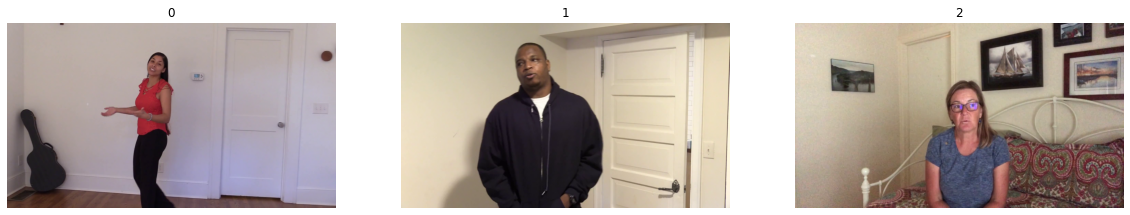

In [ ]:
display_frames_from_list(real_sample)

In [27]:
!pip install facenet_pytorch
from tqdm.notebook import tqdm
from PIL import Image
from facenet_pytorch import MTCNN


In [ ]:
mtcnn = MTCNN(margin=30, thresholds=[0.8, 0.9, 0.9], keep_all=True, post_process=False, device='cuda:0')

def display_faces_from_video(sample):
  # Load a video
  v_cap = cv2.VideoCapture(sample)
  v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))
  step = v_len//6 
  if v_cap.isOpened:
    print('video opened')
  # Loop through video, taking a handful of frames to form a batch
  frames = []
  for i in tqdm(range(v_len)):
      
      # Load frame
      success = v_cap.grab()
      if i % step == 0:
          success, frame = v_cap.retrieve()
      else:
          continue
      if not success:
          continue
          
      # Add to batch
      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      frames.append(frame)
      

  # Detect faces in batch
  faces = mtcnn(frames)
  #print(faces)
  fig, axes = plt.subplots(1, len(faces), squeeze=False,  figsize=(15, 6))
  for i,face_frames in enumerate(faces):
    for j, face in enumerate(face_frames):
          if j == 0:
            axes[0,i].imshow(face.permute(1, 2, 0).int().numpy())
            axes[0,i].axis('off')
    fig.show()

video opened


  0%|          | 0/300 [00:00<?, ?it/s]

6
video opened


  0%|          | 0/299 [00:00<?, ?it/s]

7
video opened


  0%|          | 0/300 [00:00<?, ?it/s]

6


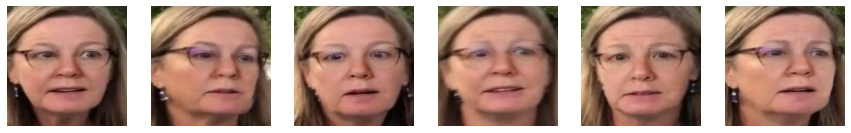

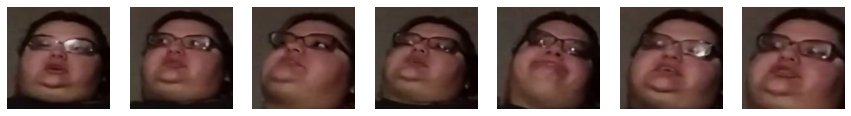

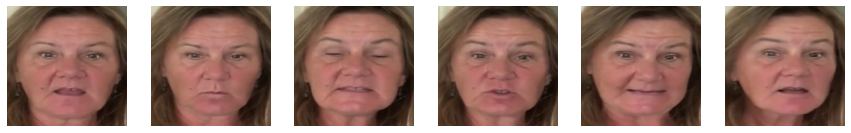

In [ ]:
for video in fake_sample:
  display_faces_from_video(video)

video opened


  0%|          | 0/300 [00:00<?, ?it/s]

video opened


  0%|          | 0/300 [00:00<?, ?it/s]

video opened


  0%|          | 0/300 [00:00<?, ?it/s]

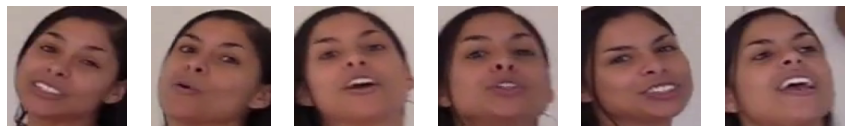

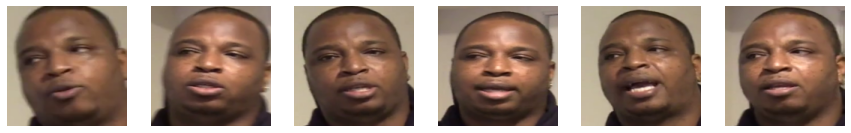

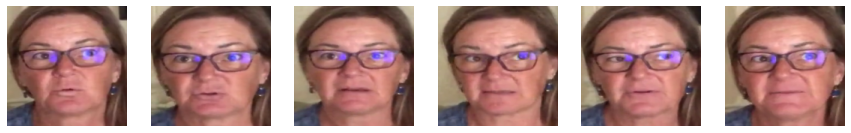

In [ ]:
for video in real_sample:
  display_faces_from_video(video)

Originals with most reproduced 

In [ ]:
display_faces_from_video(df.at([df.index == 'ypgayhhaxx.mp4', fullpath])

SyntaxError: ignored

In [ ]:
df.loc(['ypgayhhaxx.mp4'], ['fullpath'])

TypeError: ignored

### CELEB-DF-v2 EDA

In [ ]:
os.getcwd()

'h:\\project\\CelebDF-v2'

In [ ]:
directory = os.chdir('./CelebDF-v2')


def get_filelist(subdir):
    '''
    extract filenames from 
    
     subfolder and put in a list
    '''
    files = []
    cwd= os.getcwd()
    for r, d, f in os.walk(subdir):
        files.extend([os.path.join(cwd,r, _) for _ in f])
        break
    return files

celeb_real = get_filelist('Celeb-real')    
yt_real = get_filelist('YouTube-real')
celeb_fake = get_filelist('Celeb-synthesis')
celeb_real = celeb_real + yt_real

In [ ]:
len(celeb_real), len(celeb_fake)

(890, 5639)

In [ ]:
#create a dataframe 
data_dict = {
    'filename': [c.split('\\')[-1] for c in celeb_real] + [c.split('/')[-1] for c in celeb_fake],
    'label': ['REAL']*len(celeb_real) + ['FAKE']*len(celeb_fake),
    'fullpath': celeb_real + celeb_fake
    
}  
df2 = pd.DataFrame(data_dict)
df2.set_index('filename', inplace=True)
df2.head()

label                                       fullpath
filename                                                         
id0_0000.mp4  REAL  h:\project\CelebDF-v2\Celeb-real\id0_0000.mp4
id0_0001.mp4  REAL  h:\project\CelebDF-v2\Celeb-real\id0_0001.mp4
id0_0002.mp4  REAL  h:\project\CelebDF-v2\Celeb-real\id0_0002.mp4
id0_0003.mp4  REAL  h:\project\CelebDF-v2\Celeb-real\id0_0003.mp4
id0_0004.mp4  REAL  h:\project\CelebDF-v2\Celeb-real\id0_0004.mp4

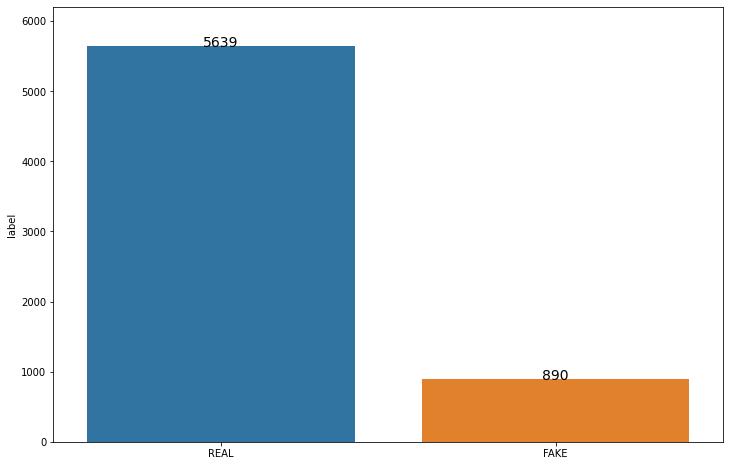

In [ ]:
import seaborn as sns
#plot and annotate data
frequencies= df2.label.value_counts()

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df2.label.unique(), y=frequencies, ax=ax)

for i in range(len(frequencies)):
        plt.text(i, frequencies[i], frequencies[i], ha = 'center', fontsize=14)

ax.margins(y=0.1)

In [ ]:
fake_sample = df2[df2.label == 'FAKE'].sample(3).fullpath.to_list()
fake_sample

['/content/drive/MyDrive/deepfake-detection/CelebDF-v2/Celeb-synthesis/id3_id1_0007.mp4',
 '/content/drive/MyDrive/deepfake-detection/CelebDF-v2/Celeb-synthesis/id33_id29_0007.mp4',
 '/content/drive/MyDrive/deepfake-detection/CelebDF-v2/Celeb-synthesis/id16_id3_0002.mp4']

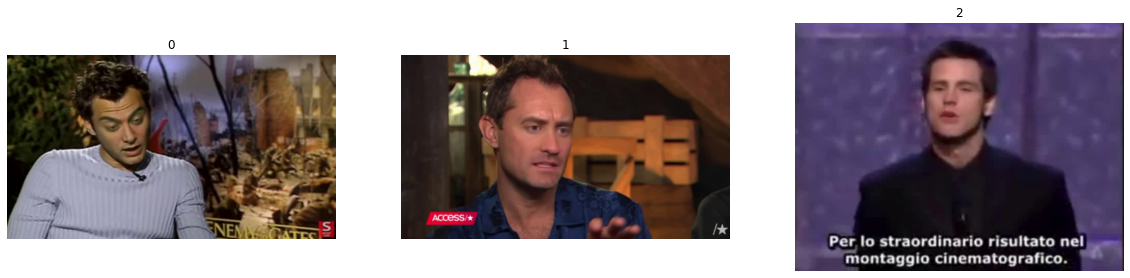

In [ ]:
display_frames_from_list(fake_sample)

In [ ]:
real_sample = df2[df2.label == 'REAL'].sample(3).fullpath.to_list()
real_sample


['/content/drive/MyDrive/CelebDF-v2/Celeb-real/id3_0003.mp4',
 '/content/drive/MyDrive/CelebDF-v2/Celeb-real/id25_0006.mp4',
 '/content/drive/MyDrive/CelebDF-v2/Celeb-real/id24_0006.mp4']

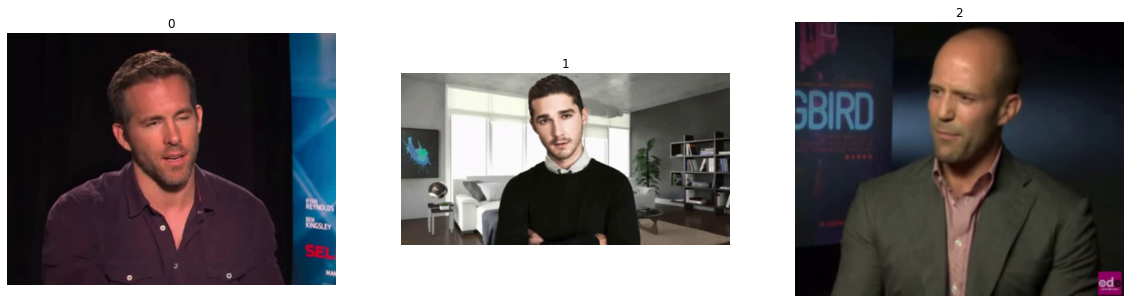

In [ ]:
display_frames_from_list(real_sample)

### Face Analysis

To extract the faces from the frames we will be using the MTCNN

In [ ]:


class FaceDetector:
  def __init__(self):
    self.detector = MTCNN(margin=0, thresholds=[0.85, 0.95, 0.95], device="cuda:0")

  def detect(self, frame):
    bboxes, *_ = self.detector.detect(frame, landmarks=False)
    return bboxes


  0%|          | 0/372 [00:00<?, ?it/s]

6


  0%|          | 0/492 [00:00<?, ?it/s]

6


  0%|          | 0/266 [00:00<?, ?it/s]

7


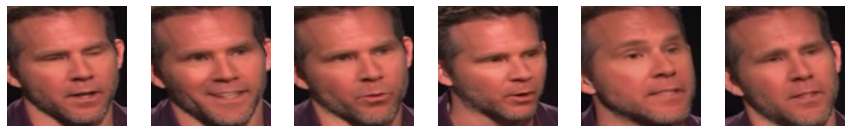

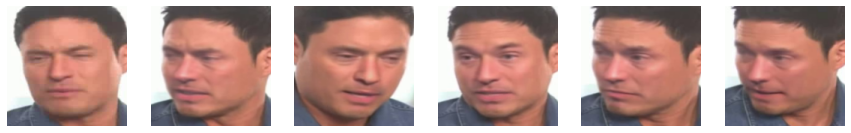

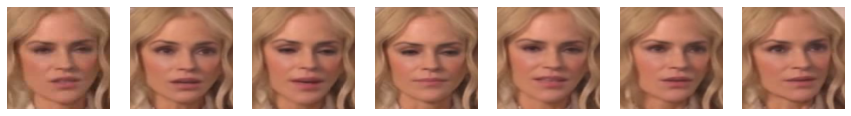

In [ ]:


for video in fake_sample:
  display_faces_from_video(video)

  0%|          | 0/372 [00:00<?, ?it/s]

6


  0%|          | 0/315 [00:00<?, ?it/s]

7


  0%|          | 0/339 [00:00<?, ?it/s]

7


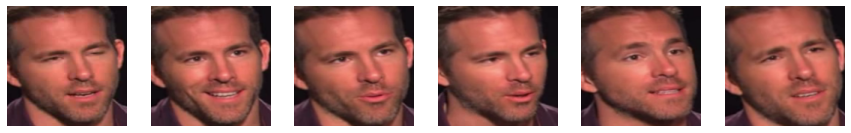

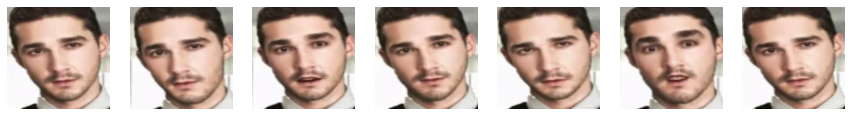

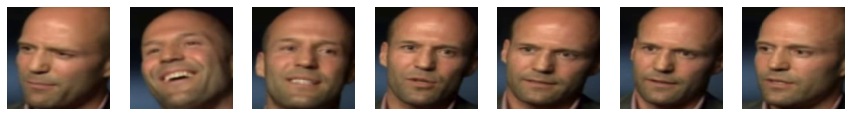

In [ ]:
for video in real_sample:
  display_faces_from_video(video)

Preprocessing


In [ ]:
#@markdown #**Anti-Disconnect for Google Colab**
#@markdown ## Run this to stop it from disconnecting automatically 
#@markdown  **(disconnects anyhow after 6 - 12 hrs for using the free version of Colab.)**
#@markdown  *(Pro users will get about 24 hrs usage time[depends])*
#@markdown ---

import IPython
js_code = '''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [ ]:
import glob

def create_face_videos(path_list,out_dir):

  for path in tqdm(path_list):

    #output 
    id = os.path.splitext(os.path.basename(path))[0]
    img_dir = os.path.join(out_dir, id)
    already_present_count =  len(glob.glob(img_dir+'/*'))

    if already_present_count > 50:
        print('skipping ', img_dir)
        continue

    #input 
    v_cap = cv2.VideoCapture(path)
    v_len = int(v_cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if not v_cap.isOpened():
      print('error: skipping ', path)
      continue

    os.makedirs(img_dir, exist_ok=True)
    frames = []
    faces = []
    indexes = []
    batch_size=15
    print(img_dir)

    for idx in range(v_len):

      if idx >= 150: # get first 150 frames only
        break

      # Load frame
      success, frame = v_cap.read()
      if not success:
          continue

      frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      frames.append(Image.fromarray(frame))
      indexes.append(idx)

      if len(frames) >= batch_size or idx == 149:
        try:
          save_paths = [os.path.join(img_dir, "{}.png".format(i)) for i in indexes]
          mtcnn(frames, save_path=save_paths)
          frames = []
          indexes = []
        except Exception as e:
          print('Error: ',e)
          pass


      #if faces is None:
      #  continue
      #for j,face in enumerate(faces):
      #try:
          #face = [el if el > 0 else 0 for el in face ]
          #left, top, right, bottom= face

          #p_w = int((right-left) * 0.15)
          #p_h = int((top-bottom) * 0.15)
          #left, top, right, bottom = left-p_w, top+p_h, right+p_w, bottom-p_h
          #cv2.imwrite(os.path.join(img_dir, "{}_{}.png".format(idx, j)), frame[int(top):int(bottom), int(left):int(right)])


      #  except Exception as e:
      #    print('Error: ',e)
      #    pass


    v_cap.release()


In [ ]:
os.getcwd()

'h:\\project\\CelebDF-v2'

In [ ]:
create_face_videos(df.fullpath.tolist(), './dfdc/faces')


NameError: name 'df' is not defined

In [ ]:
create_face_videos(df2.fullpath.tolist(), 'h:\\project\\CelebDF-v2\\faces')

  0%|          | 0/6529 [00:00<?, ?it/s]

skipping  h:\project\CelebDF-v2\faces\id0_0000
skipping  h:\project\CelebDF-v2\faces\id0_0001
skipping  h:\project\CelebDF-v2\faces\id0_0002
skipping  h:\project\CelebDF-v2\faces\id0_0003
skipping  h:\project\CelebDF-v2\faces\id0_0004
skipping  h:\project\CelebDF-v2\faces\id0_0005
skipping  h:\project\CelebDF-v2\faces\id0_0006
skipping  h:\project\CelebDF-v2\faces\id0_0007
skipping  h:\project\CelebDF-v2\faces\id0_0008
skipping  h:\project\CelebDF-v2\faces\id0_0009
skipping  h:\project\CelebDF-v2\faces\id10_0000
skipping  h:\project\CelebDF-v2\faces\id10_0001
skipping  h:\project\CelebDF-v2\faces\id10_0002
skipping  h:\project\CelebDF-v2\faces\id10_0003
skipping  h:\project\CelebDF-v2\faces\id10_0004
skipping  h:\project\CelebDF-v2\faces\id10_0005
skipping  h:\project\CelebDF-v2\faces\id10_0006
skipping  h:\project\CelebDF-v2\faces\id10_0007
skipping  h:\project\CelebDF-v2\faces\id10_0008
skipping  h:\project\CelebDF-v2\faces\id10_0009
skipping  h:\project\CelebDF-v2\faces\id11_0000
sk

C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facenet_pytorch\models\utils\detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facenet_pytorch\models\mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  boxes = np.array(boxes)
C:

skipping  h:\project\CelebDF-v2\faces\id24_0001
h:\project\CelebDF-v2\faces\id24_0002
h:\project\CelebDF-v2\faces\id24_0003
h:\project\CelebDF-v2\faces\id24_0004
skipping  h:\project\CelebDF-v2\faces\id24_0005
h:\project\CelebDF-v2\faces\id24_0006
skipping  h:\project\CelebDF-v2\faces\id24_0007
skipping  h:\project\CelebDF-v2\faces\id24_0008
skipping  h:\project\CelebDF-v2\faces\id24_0009
skipping  h:\project\CelebDF-v2\faces\id25_0000
skipping  h:\project\CelebDF-v2\faces\id25_0001
skipping  h:\project\CelebDF-v2\faces\id25_0002
h:\project\CelebDF-v2\faces\id25_0003
skipping  h:\project\CelebDF-v2\faces\id25_0004
h:\project\CelebDF-v2\faces\id25_0005
skipping  h:\project\CelebDF-v2\faces\id25_0006
skipping  h:\project\CelebDF-v2\faces\id25_0007
skipping  h:\project\CelebDF-v2\faces\id25_0008
h:\project\CelebDF-v2\faces\id25_0009
h:\project\CelebDF-v2\faces\id25_0010
h:\project\CelebDF-v2\faces\id26_0000
skipping  h:\project\CelebDF-v2\faces\id26_0001
skipping  h:\project\CelebDF-v2\fa

In [ ]:
df.drop(['original', 'split'], inplace=True, axis=1)
df_combined = pd.concat([df, df2])
df_combined.to_csv('./combined_metadata.csv')
df_combined.sample(20)

In [ ]:
df2.loc['id53_id50_0007.mp4':,:]

label                                           fullpath
filename                                                                   
id53_id50_0007.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id4_id2_0009.mp4    FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id45_id43_0004.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id49_id55_0009.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id33_id30_0009.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
...                  ...                                                ...
id20_id25_0003.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id19_id27_0006.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id49_id57_0000.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id28_id1_0003.mp4   FAKE  /content/drive/MyDrive/deepfake-detection/Cele...
id23_id16_0004.mp4  FAKE  /content/drive/MyDrive/deepfake-detection/Cele...

[4223 rows x 2 columns]

Youtube Faces


In [1]:
os.chdir('H:\\project\\youtube_faces_dataset')

In [23]:
videoDF = pd.read_csv('./youtube_faces_with_keypoints_full.csv')
videoDF.shape

(2194, 7)

In [41]:
videoDF = videoDF[videoDF.videoDuration >50]

In [42]:
videoDF.head(15)

videoID     personName  imageHeight  imageWidth  videoDuration  \
0   Alison_Lohman_0  Alison_Lohman        228.0       213.0          240.0   
1   Alison_Lohman_1  Alison_Lohman        248.0       201.0           79.0   
2   Alison_Lohman_2  Alison_Lohman        335.0       308.0          136.0   
3   Alison_Lohman_3  Alison_Lohman        151.0       110.0           53.0   
4   Alison_Lohman_4  Alison_Lohman        236.0       228.0          147.0   
5   Alison_Lohman_5  Alison_Lohman        227.0       179.0           68.0   
6    Kevin_Spacey_0   Kevin_Spacey        196.0       264.0           91.0   
7    Kevin_Spacey_1   Kevin_Spacey        260.0       217.0           59.0   
8    Kevin_Spacey_2   Kevin_Spacey        186.0       175.0           71.0   
9    Kevin_Spacey_3   Kevin_Spacey        100.0        89.0           99.0   
10   Kevin_Spacey_4   Kevin_Spacey        212.0       207.0          240.0   
11   Kevin_Spacey_5   Kevin_Spacey        242.0       205.0          203.0   
12  Lauren_Hutton_0  Lauren_Hutton        223.0       202.0          127.0   
13  Lauren_Hutton_1  Lauren_Hutton        279.0       213.0           68.0   
14  Lauren_Hutton_2  Lauren_Hutton        320.0       361.0           55.0   

    averageFaceSize  numVideosForPerson  
0         90.150000                 6.0  
1        108.417722                 6.0  
2        122.161765                 6.0  
3         58.000000                 6.0  
4         91.680272                 6.0  
5        105.647059                 6.0  
6         99.912088                 6.0  
7        120.186441                 6.0  
8         86.746479                 6.0  
9         44.636364                 6.0  
10        99.025000                 6.0  
11       116.886700                 6.0  
12        96.086614                 6.0  
13       107.191176                 6.0  
14       193.781818                 6.0

In [14]:
import glob
os.getcwd()

'H:\\project\\youtube_faces_dataset'

In [19]:
npzFilesFullPath = glob.glob('./youtube_faces_*/youtube_faces_*/*.npz')
videoIDs = [x.split('\\')[-1].split('.')[0] for x in npzFilesFullPath]
fullPaths = {}
for videoID, fullPath in zip(videoIDs, npzFilesFullPath):
    fullPaths[videoID] = fullPath

In [21]:
fullPaths

{'Aaron_Eckhart_0': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Aaron_Eckhart_0.npz',
 'Aaron_Eckhart_1': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Aaron_Eckhart_1.npz',
 'Abba_Eban_0': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abba_Eban_0.npz',
 'Abba_Eban_5': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abba_Eban_5.npz',
 'Abdel_Aziz_Al-Hakim_0': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abdel_Aziz_Al-Hakim_0.npz',
 'Abdel_Aziz_Al-Hakim_1': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abdel_Aziz_Al-Hakim_1.npz',
 'Abdel_Aziz_Al-Hakim_4': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abdel_Aziz_Al-Hakim_4.npz',
 'Abdoulaye_Wade_0': '.\\youtube_faces_with_keypoints_full_1\\youtube_faces_with_keypoints_full_1\\Abdoulaye_Wade_0.npz',
 'Abdoulaye_Wade_1

In [29]:
mtcnn = MTCNN(margin=50, thresholds=[0.8, 0.9, 0.9], keep_all=True, post_process=False, device='cuda:0')

In [48]:
videoDF.videoID.values

array(['Alison_Lohman_0', 'Alison_Lohman_1', 'Alison_Lohman_2', ...,
       'Zahir_Shah_1', 'Zoran_Djindjic_0', 'Zoran_Djindjic_2'],
      dtype=object)

In [53]:
os.getcwd()

'H:\\project\\youtube_faces_dataset'

In [54]:
# capture and save faces from frames from each video
np.random.seed(3)
from PIL import Image

for videoID in videoDF.videoID.values:
    
    path = fullPaths[videoID]  
    #output 
    id = videoID
    img_dir = os.path.join('./faces', id)
    already_present_count =  len(glob.glob(img_dir+'/*'))

    if already_present_count > 50:
        print('skipping ', img_dir)
        continue
      
  
    # load video
    videoFile = np.load(path)
    colorImages = videoFile['colorImages']
    frameTotal = (colorImages.shape)[-1]
    frames = []
    indexes = []
    batch_size = 15
    print(img_dir)

    for frameInd in range(frameTotal):
        im = Image.fromarray(colorImages[:,:,:,frameInd])
        frames.append(im)
        indexes.append(frameInd)

    
        if len(frames) >= batch_size or frameInd == 149:
          try:
            save_paths = [os.path.join(img_dir, "{}.png".format(i)) for i in indexes]
            mtcnn(frames, save_path=save_paths)
            frames = []
            indexes = []
          except Exception as e:
            print('Error: ',e)
            pass



./faces\Alison_Lohman_0
./faces\Alison_Lohman_1
./faces\Alison_Lohman_2
./faces\Alison_Lohman_3
./faces\Alison_Lohman_4
./faces\Alison_Lohman_5
./faces\Kevin_Spacey_0
./faces\Kevin_Spacey_1
./faces\Kevin_Spacey_2
./faces\Kevin_Spacey_3
./faces\Kevin_Spacey_4
./faces\Kevin_Spacey_5
./faces\Lauren_Hutton_0
./faces\Lauren_Hutton_1


C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facenet_pytorch\models\utils\detect_face.py:183: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  batch_boxes, batch_points = np.array(batch_boxes), np.array(batch_points)
C:\Users\leovc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\facenet_pytorch\models\mtcnn.py:339: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  boxes = np.array(boxes)
C:

./faces\Lauren_Hutton_2
./faces\Lauren_Hutton_3
./faces\Lauren_Hutton_4
./faces\Lauren_Hutton_5
./faces\Robert_F_Kennedy_Jr_0
./faces\Robert_F_Kennedy_Jr_1
./faces\Robert_F_Kennedy_Jr_2
./faces\Robert_F_Kennedy_Jr_4
./faces\Robert_F_Kennedy_Jr_5
./faces\Amanda_Beard_0
./faces\Amanda_Beard_1
./faces\Amanda_Beard_2
./faces\Amanda_Beard_3
./faces\Amanda_Beard_4
./faces\Andrew_Bernard_0
./faces\Andrew_Bernard_1
./faces\Andrew_Bernard_2
./faces\Andrew_Bernard_3
./faces\Andrew_Bernard_4
./faces\Barbara_Brezigar_1
./faces\Barbara_Brezigar_2
./faces\Barbara_Brezigar_3
./faces\Barbara_Brezigar_4
./faces\Barbara_Brezigar_5
./faces\Daniel_Kurtzer_0
./faces\Daniel_Kurtzer_1
./faces\Daniel_Kurtzer_2
./faces\Daniel_Kurtzer_3
./faces\Daniel_Kurtzer_4
./faces\Elizabeth_Berkeley_2
./faces\Elizabeth_Berkeley_3
./faces\Elizabeth_Berkeley_4
./faces\Elizabeth_Berkeley_5
./faces\Fred_Eckhard_0
./faces\Fred_Eckhard_1
./faces\Fred_Eckhard_2
./faces\Fred_Eckhard_3
./faces\Fred_Eckhard_4
./faces\George_W_Bush_0

In [55]:
videoDF.to_csv('./youtube_faces_50f.csv')

: 